In [25]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [26]:
import base64
import io
import dash
import dash_core_components as dcc
import dash_html_components as html
import plotly.graph_objects as go
import cv2
import numpy as np
from dash.dependencies import Input, Output
from PIL import Image

# Initialize the Dash app
app = dash.Dash(__name__)

# App layout
app.layout = html.Div([
    html.H1("Image Intensity Viewer"),
    dcc.Upload(
        id='upload-image',
        children=html.Button('Upload Image'),
        multiple=False
    ),
    html.Div(id='output-image-upload')
])

# Callback for processing and displaying the image intensity
@app.callback(
    Output('output-image-upload', 'children'),
    [Input('upload-image', 'contents')]
)
def update_output(content):
    if content is not None:
        # Decode base64 image data
        content_type, content_string = content.split(',')
        decoded = base64.b64decode(content_string)
        img = Image.open(io.BytesIO(decoded))

        # Convert image to grayscale using OpenCV
        image_np = np.array(img)
        if len(image_np.shape) == 3 and image_np.shape[2] == 3:  # Check if the image is RGB
            image_gray = cv2.cvtColor(image_np, cv2.COLOR_RGB2GRAY)
        else:
            image_gray = image_np  # Image is already grayscale

        # Create a Plotly heatmap to show intensity values
        fig = go.Figure(data=go.Heatmap(
            z=image_gray,
            colorscale='Viridis'
        ))

        fig.update_layout(
            title='Intensity Map',
            xaxis=dict(visible=False),
            yaxis=dict(visible=False,autorange='reversed')
        )

        return dcc.Graph(figure=fig)

# Run the Dash app
if __name__ == '__main__':
    app.run_server(debug=True)


<IPython.core.display.Javascript object>

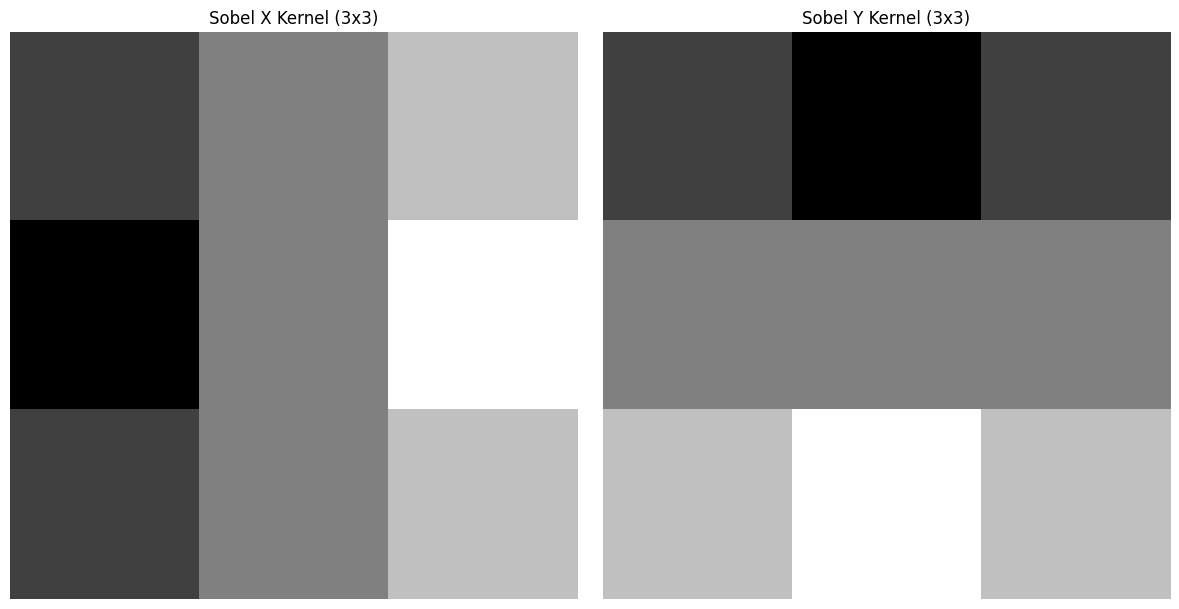

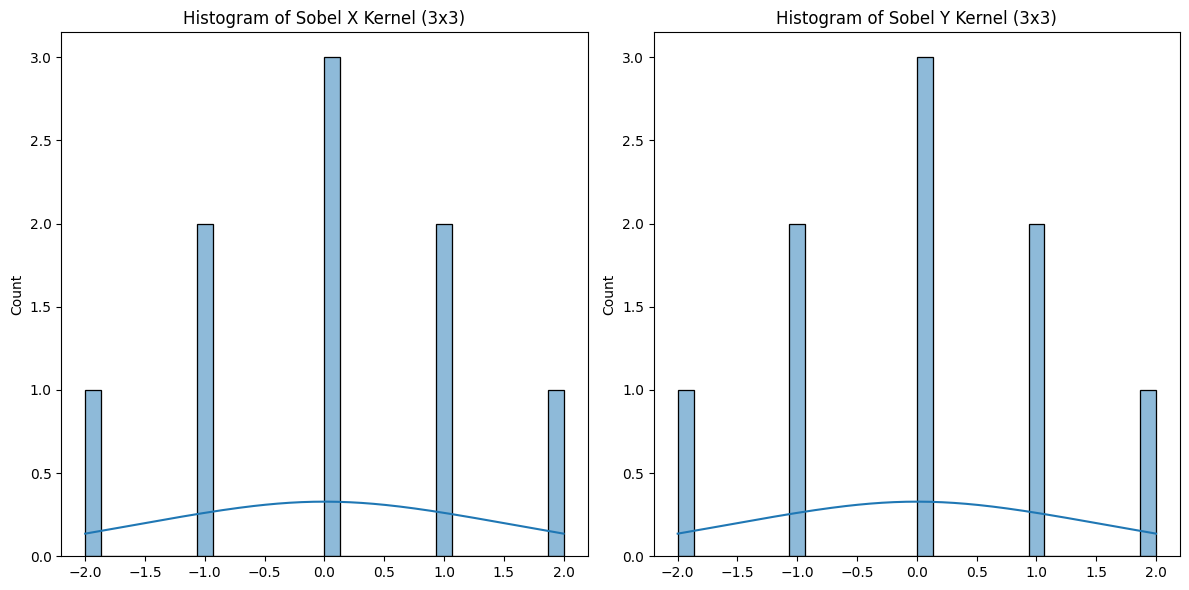

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define the Sobel 3x3 kernels
sobel_x_3x3 = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
])

sobel_y_3x3 = np.array([
    [-1, -2, -1],
    [0, 0, 0],
    [1, 2, 1]
])

# Plot the Sobel X and Sobel Y kernels as images (3x3)
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Display Sobel X (3x3)
ax[0].imshow(sobel_x_3x3, cmap='gray', interpolation='nearest')
ax[0].set_title('Sobel X Kernel (3x3)')
ax[0].axis('off')

# Display Sobel Y (3x3)
ax[1].imshow(sobel_y_3x3, cmap='gray', interpolation='nearest')
ax[1].set_title('Sobel Y Kernel (3x3)')
ax[1].axis('off')

plt.tight_layout()
plt.show()

# Plot the histograms of the Sobel X and Sobel Y kernels (3x3)
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Plot histogram for Sobel X (3x3)
sns.histplot(sobel_x_3x3.flatten(), kde=True, bins=30, ax=ax[0])
ax[0].set_title('Histogram of Sobel X Kernel (3x3)')

# Plot histogram for Sobel Y (3x3)
sns.histplot(sobel_y_3x3.flatten(), kde=True, bins=30, ax=ax[1])
ax[1].set_title('Histogram of Sobel Y Kernel (3x3)')

plt.tight_layout()
plt.show()


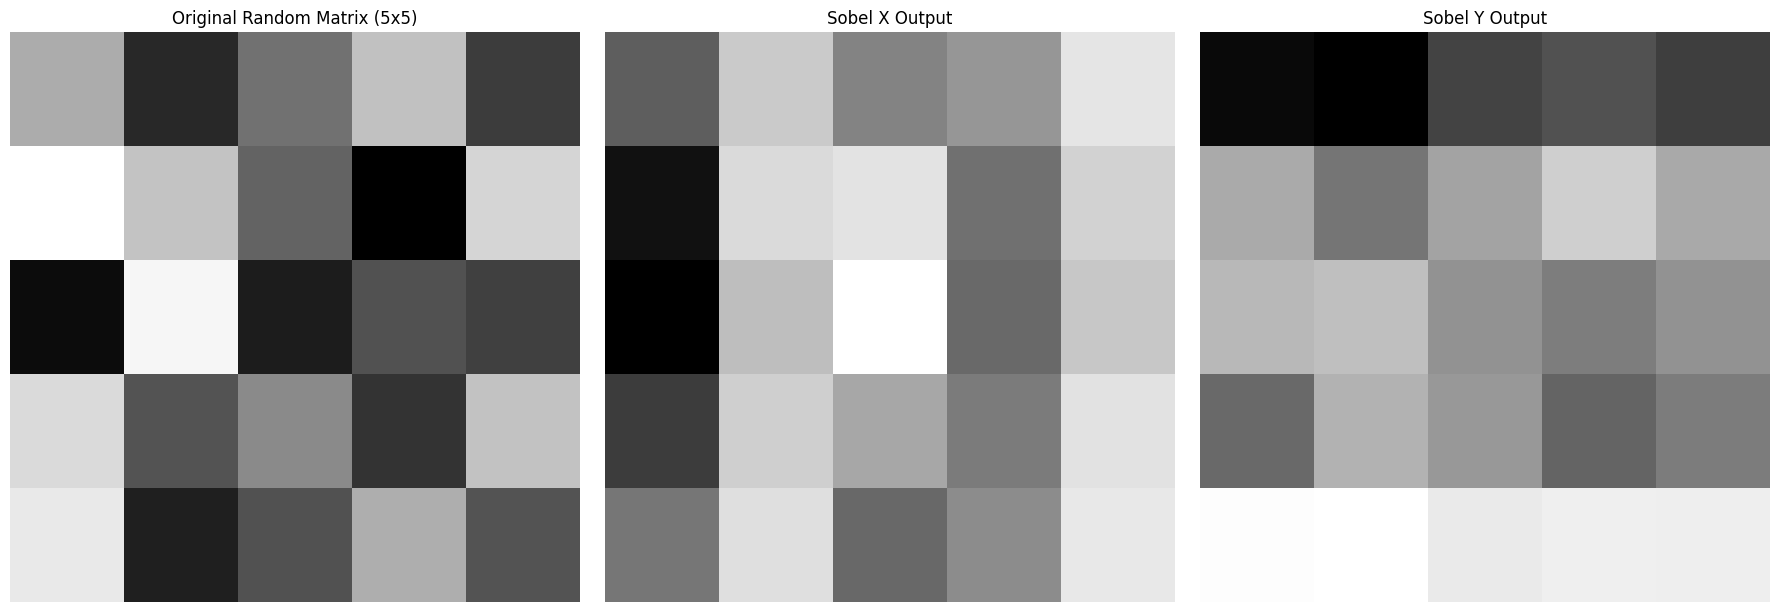

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.ndimage import convolve

# Define the Sobel 3x3 kernels
sobel_x_3x3 = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
])

sobel_y_3x3 = np.array([
    [-1, -2, -1],
    [0, 0, 0],
    [1, 2, 1]
])

# Generate a random 5x5 matrix
np.random.seed(0)  # For reproducibility
random_matrix = np.random.randint(0, 256, size=(5, 5))

# Perform convolution with Sobel X and Sobel Y kernels
sobel_x_output = convolve(random_matrix, sobel_x_3x3, mode='constant', cval=0.0)
sobel_y_output = convolve(random_matrix, sobel_y_3x3, mode='constant', cval=0.0)

# Plot the original random matrix and Sobel output matrices
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# Plot the random 5x5 matrix
ax[0].imshow(random_matrix, cmap='gray', interpolation='nearest')
ax[0].set_title('Original Random Matrix (5x5)')
ax[0].axis('off')

# Plot the Sobel X output
ax[1].imshow(sobel_x_output, cmap='gray', interpolation='nearest')
ax[1].set_title('Sobel X Output')
ax[1].axis('off')

# Plot the Sobel Y output
ax[2].imshow(sobel_y_output, cmap='gray', interpolation='nearest')
ax[2].set_title('Sobel Y Output')
ax[2].axis('off')

plt.tight_layout()
plt.show()


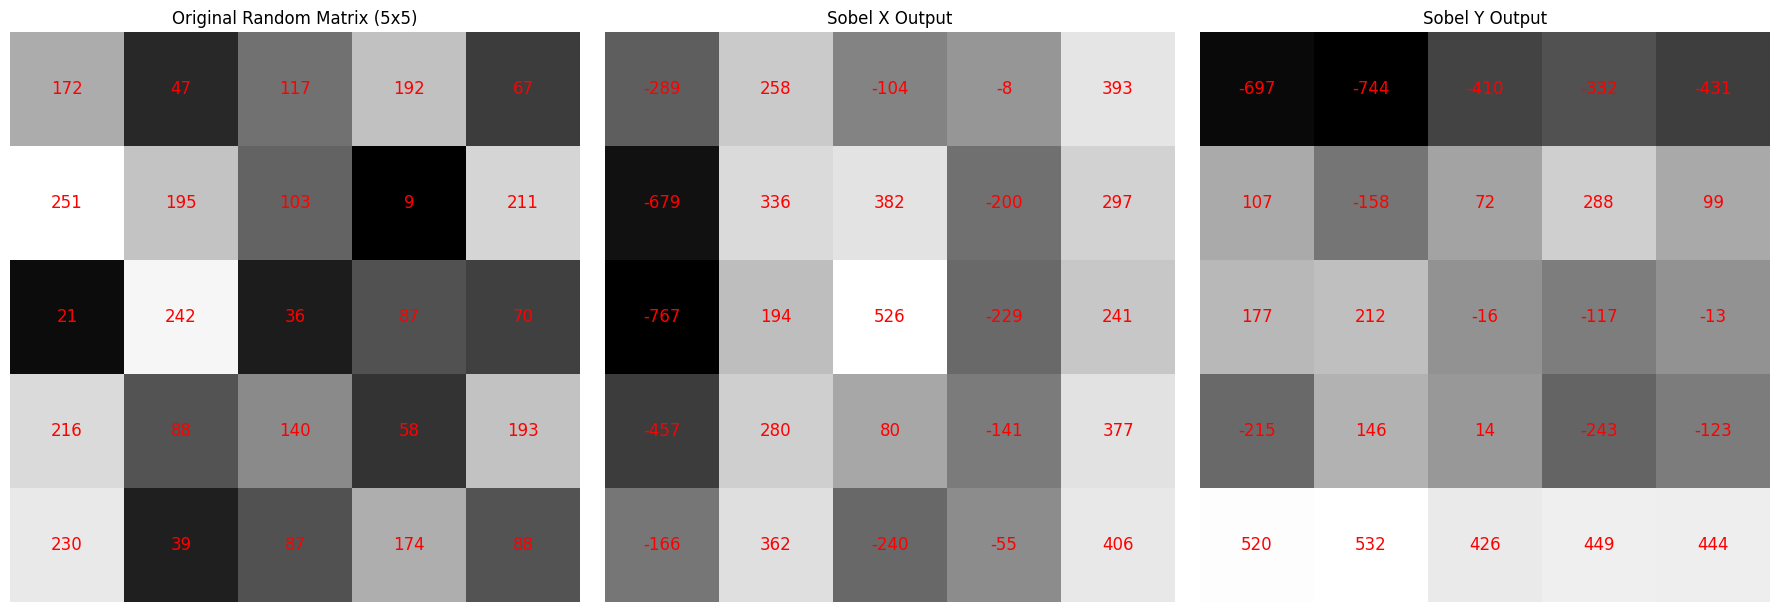

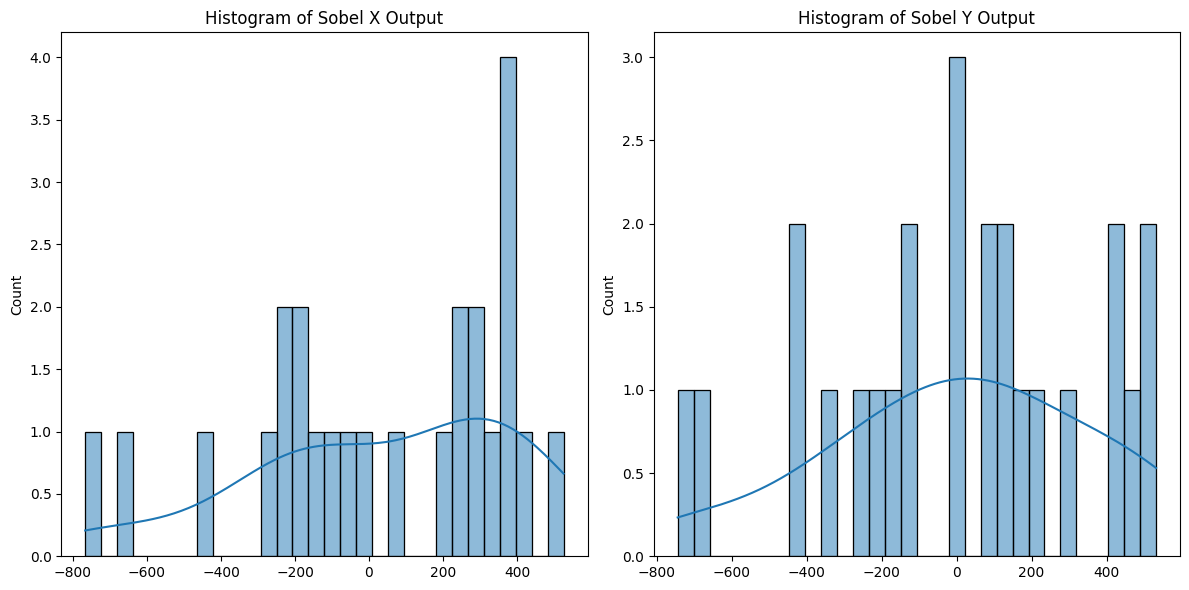

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.ndimage import convolve

# Define the Sobel 3x3 kernels
sobel_x_3x3 = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
])

sobel_y_3x3 = np.array([
    [-1, -2, -1],
    [0, 0, 0],
    [1, 2, 1]
])

# Generate a random 5x5 matrix
np.random.seed(0)  # For reproducibility
random_matrix = np.random.randint(0, 256, size=(5, 5))

# Perform convolution with Sobel X and Sobel Y kernels
sobel_x_output = convolve(random_matrix, sobel_x_3x3, mode='constant', cval=0.0)
sobel_y_output = convolve(random_matrix, sobel_y_3x3, mode='constant', cval=0.0)

# Plot the original random matrix and Sobel output matrices with values in grid
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# Function to display the values in grid
def display_values_in_grid(matrix, ax):
    ax.imshow(matrix, cmap='gray', interpolation='nearest')
    for (i, j), val in np.ndenumerate(matrix):
        ax.text(j, i, f'{val}', ha='center', va='center', color='red', fontsize=12)
        ax.axis('off')

# Plot the random 5x5 matrix with values
ax[0].set_title('Original Random Matrix (5x5)')
display_values_in_grid(random_matrix, ax[0])

# Plot the Sobel X output with values
ax[1].set_title('Sobel X Output')
display_values_in_grid(sobel_x_output, ax[1])

# Plot the Sobel Y output with values
ax[2].set_title('Sobel Y Output')
display_values_in_grid(sobel_y_output, ax[2])

plt.tight_layout()
plt.show()

# Plot the histograms of the Sobel X and Sobel Y output matrices
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Plot histogram for Sobel X output
sns.histplot(sobel_x_output.flatten(), kde=True, bins=30, ax=ax[0])
ax[0].set_title('Histogram of Sobel X Output')

# Plot histogram for Sobel Y output
sns.histplot(sobel_y_output.flatten(), kde=True, bins=30, ax=ax[1])
ax[1].set_title('Histogram of Sobel Y Output')

plt.tight_layout()
plt.show()


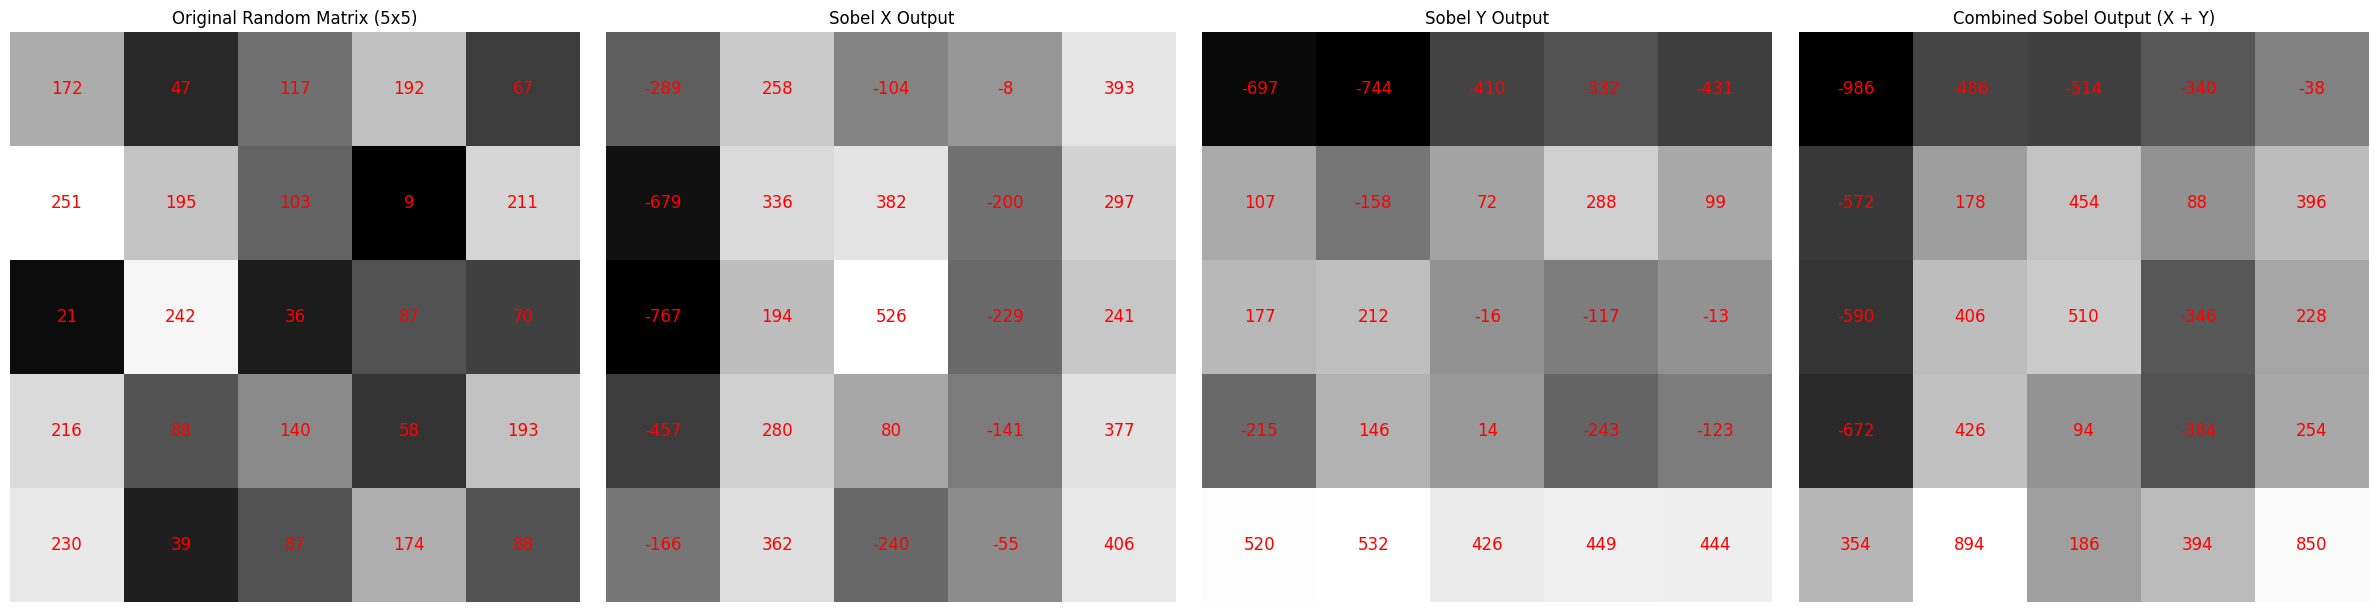

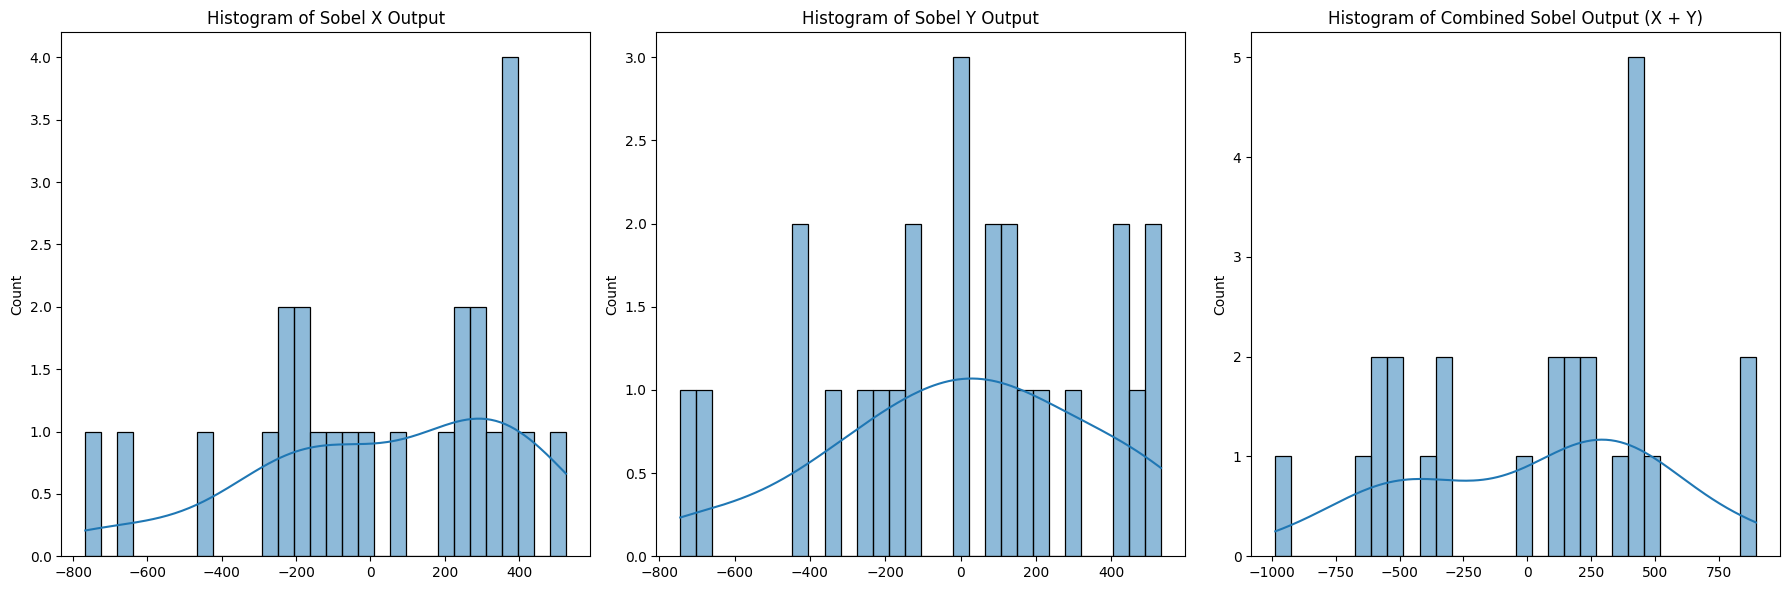

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.ndimage import convolve

# Define the Sobel 3x3 kernels
sobel_x_3x3 = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
])

sobel_y_3x3 = np.array([
    [-1, -2, -1],
    [0, 0, 0],
    [1, 2, 1]
])

# Generate a random 5x5 matrix
np.random.seed(0)  # For reproducibility
random_matrix = np.random.randint(0, 256, size=(5, 5))

# Perform convolution with Sobel X and Sobel Y kernels
sobel_x_output = convolve(random_matrix, sobel_x_3x3, mode='constant', cval=0.0)
sobel_y_output = convolve(random_matrix, sobel_y_3x3, mode='constant', cval=0.0)

# Add the Sobel X and Sobel Y outputs
combined_output = sobel_x_output + sobel_y_output

# Plot the original random matrix and Sobel output matrices with values in grid
fig, ax = plt.subplots(1, 4, figsize=(24, 6))

# Function to display the values in grid
def display_values_in_grid(matrix, ax):
    ax.imshow(matrix, cmap='gray', interpolation='nearest')
    for (i, j), val in np.ndenumerate(matrix):
        ax.text(j, i, f'{val}', ha='center', va='center', color='red', fontsize=12)
    ax.axis('off')

# Plot the random 5x5 matrix with values
ax[0].set_title('Original Random Matrix (5x5)')
display_values_in_grid(random_matrix, ax[0])

# Plot the Sobel X output with values
ax[1].set_title('Sobel X Output')
display_values_in_grid(sobel_x_output, ax[1])

# Plot the Sobel Y output with values
ax[2].set_title('Sobel Y Output')
display_values_in_grid(sobel_y_output, ax[2])

# Plot the combined Sobel output with values
ax[3].set_title('Combined Sobel Output (X + Y)')
display_values_in_grid(combined_output, ax[3])

plt.tight_layout()
plt.show()

# Plot the histograms of the Sobel X, Sobel Y, and combined output matrices
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# Plot histogram for Sobel X output
sns.histplot(sobel_x_output.flatten(), kde=True, bins=30, ax=ax[0])
ax[0].set_title('Histogram of Sobel X Output')

# Plot histogram for Sobel Y output
sns.histplot(sobel_y_output.flatten(), kde=True, bins=30, ax=ax[1])
ax[1].set_title('Histogram of Sobel Y Output')

# Plot histogram for combined Sobel output
sns.histplot(combined_output.flatten(), kde=True, bins=30, ax=ax[2])
ax[2].set_title('Histogram of Combined Sobel Output (X + Y)')

plt.tight_layout()
plt.show()


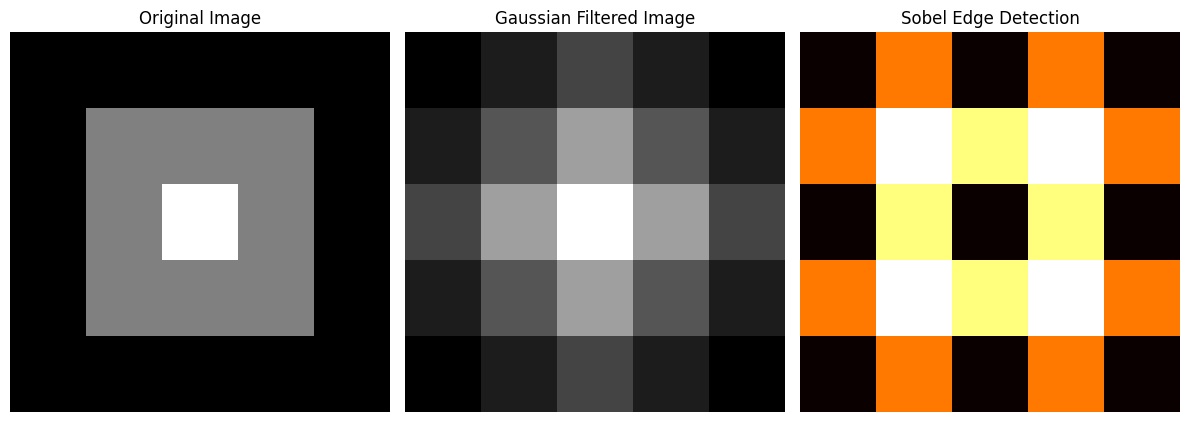

In [37]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Create a 5x5 grayscale image (example image)
image = np.array([
    [100, 100, 100, 100, 100],
    [100, 150, 150, 150, 100],
    [100, 150, 200, 150, 100],
    [100, 150, 150, 150, 100],
    [100, 100, 100, 100, 100]
], dtype=np.uint8)

# Step 1: Apply Gaussian filter to smooth the image
gaussian_filtered = cv2.GaussianBlur(image, (3, 3), 1)

# Step 2: Apply Sobel filter to detect edges
sobel_x = cv2.Sobel(gaussian_filtered, cv2.CV_64F, 1, 0, ksize=3)  # Sobel in X direction
sobel_y = cv2.Sobel(gaussian_filtered, cv2.CV_64F, 0, 1, ksize=3)  # Sobel in Y direction

# Compute gradient magnitude
sobel_mag = cv2.magnitude(sobel_x, sobel_y)

# Plot the results
plt.figure(figsize=(12, 6))

# Original image
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Gaussian filtered image
plt.subplot(1, 3, 2)
plt.imshow(gaussian_filtered, cmap='gray')
plt.title('Gaussian Filtered Image')
plt.axis('off')

# Sobel edge detection result
plt.subplot(1, 3, 3)
plt.imshow(sobel_mag, cmap='hot')
plt.title('Sobel Edge Detection')
plt.axis('off')

plt.tight_layout()
plt.show()


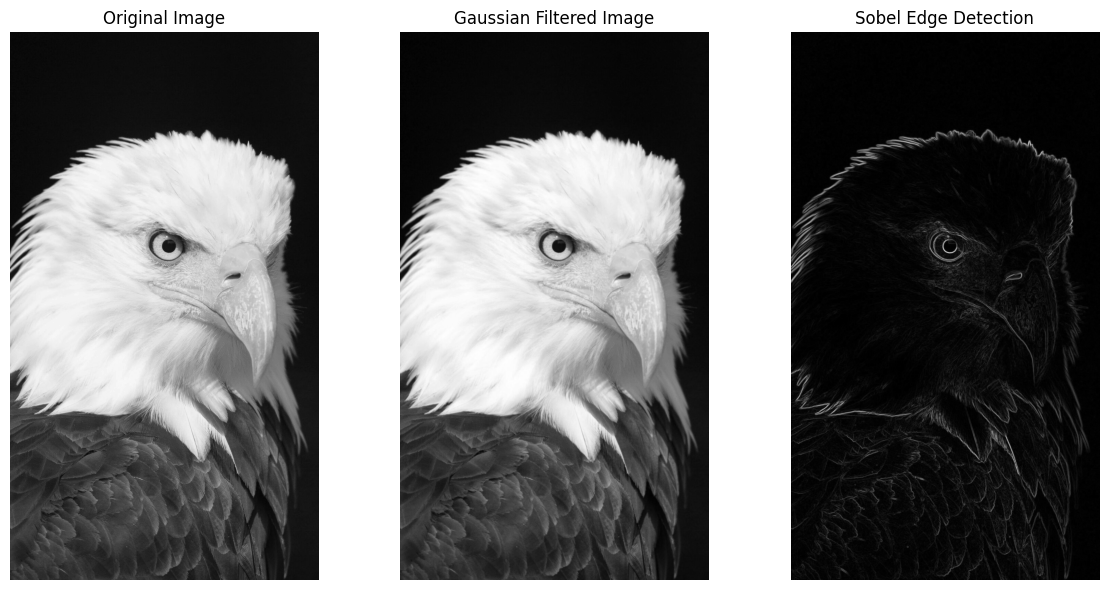

In [38]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Load an image (make sure to update the path to an image on your system)
image = cv2.imread(r'/content/drive/MyDrive/Eagle.jpg', cv2.IMREAD_GRAYSCALE)

# Check if the image was loaded successfully
if image is None:
    raise ValueError("Image not found. Please check the file path.")

# Step 1: Apply Gaussian filter to smooth the image
gaussian_filtered = cv2.GaussianBlur(image, (3, 3), 1)

# Step 2: Apply Sobel filter to detect edges
sobel_x = cv2.Sobel(gaussian_filtered, cv2.CV_64F, 1, 0, ksize=3)  # Sobel in X direction
sobel_y = cv2.Sobel(gaussian_filtered, cv2.CV_64F, 0, 1, ksize=3)  # Sobel in Y direction

# Compute gradient magnitude
sobel_mag = cv2.magnitude(sobel_x, sobel_y)

# Plot the results
plt.figure(figsize=(12, 6))

# Original image
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Gaussian filtered image
plt.subplot(1, 3, 2)
plt.imshow(gaussian_filtered, cmap='gray')
plt.title('Gaussian Filtered Image')
plt.axis('off')

# Sobel edge detection result
plt.subplot(1, 3, 3)
plt.imshow(sobel_mag, cmap='gray')
plt.title('Sobel Edge Detection')
plt.axis('off')

plt.tight_layout()
plt.show()


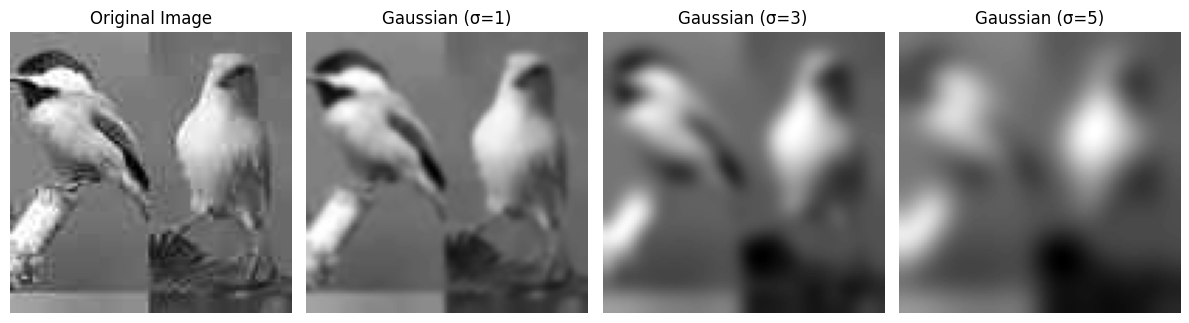

In [42]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to apply Gaussian filter with a specific standard deviation
def apply_gaussian_filter(image, sigma):
    # Apply Gaussian blur (the kernel size is chosen to be 6 times the sigma value)
    kernel_size = int(6 * sigma + 1) | 1  # Ensures that the kernel size is odd
    blurred_image = cv2.GaussianBlur(image, (kernel_size, kernel_size), sigma)
    return blurred_image

# Load an example image
image = cv2.imread(r'/content/drive/MyDrive/birds.jpg', cv2.IMREAD_GRAYSCALE)

# Standard deviations to test
sigma_values = [1, 3, 5]

# Plot original image and images after applying Gaussian filter with different sigmas
plt.figure(figsize=(12, 4))

# Plot original image
plt.subplot(1, len(sigma_values) + 1, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Plot images after applying Gaussian filter with different sigmas
for i, sigma in enumerate(sigma_values):
    blurred_image = apply_gaussian_filter(image, sigma)
    plt.subplot(1, len(sigma_values) + 1, i + 2)
    plt.imshow(blurred_image, cmap='gray')
    plt.title(f'Gaussian (σ={sigma})')
    plt.axis('off')

plt.tight_layout()
plt.show()
